# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys_sub import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

  # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # checking the response
        response = requests.get(city_url)

        # checking the status code to make sure it doent give an error
        status_code = response.status_code

        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {} #this is a failed request

        #starting to extract
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")
        #adding pressure bc it could be helpful with analysis
        city_pressure = city_weather.get("main", {}).get("pressure")
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(e)
        pass

    #sleeping time to help processing
    time.sleep(1)

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | igarka
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | lensk
City not found. Skipping...
Expecting value: line 1 column 1 (char 0)
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | saint-pierre
Processing Record 7 of Set 1 | whitehorse
Processing Record 8 of Set 1 | sitka
Processing Record 9 of Set 1 | magadan
City not found. Skipping...
Expecting value: line 1 column 1 (char 0)
Processing Record 10 of Set 1 | puerto san jose
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | ad dawadimi
Processing Record 14 of Set 1 | as salamiyah
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | los frentones
Processing Record 18 of Set 1 | constantia
Processing Record 19 of Set 1 | crane

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,igarka,67.4667,86.5833,32.02,92.0,100.0,13.00,RU,1.717330e+09
1,puerto natales,-51.7236,-72.4875,27.82,90.0,21.0,3.87,CL,1.717330e+09
2,waitangi,-43.9535,-176.5597,49.82,81.0,82.0,11.99,NZ,1.717330e+09
3,puerto ayora,-0.7393,-90.3518,68.56,97.0,91.0,3.51,EC,1.717330e+09
4,saint-pierre,-21.3393,55.4781,78.48,65.0,0.0,18.41,RE,1.717330e+09


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities_data1.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities_data1.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,igarka,67.4667,86.5833,32.02,92.0,100.0,13.00,RU,1.717330e+09
1,puerto natales,-51.7236,-72.4875,27.82,90.0,21.0,3.87,CL,1.717330e+09
2,waitangi,-43.9535,-176.5597,49.82,81.0,82.0,11.99,NZ,1.717330e+09
3,puerto ayora,-0.7393,-90.3518,68.56,97.0,91.0,3.51,EC,1.717330e+09
4,saint-pierre,-21.3393,55.4781,78.48,65.0,0.0,18.41,RE,1.717330e+09


In [9]:
city_data_df.info()
#have 29 null values + 5 empty countires

<class 'pandas.core.frame.DataFrame'>
Index: 586 entries, 0 to 585
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        586 non-null    object 
 1   Lat         557 non-null    float64
 2   Lng         557 non-null    float64
 3   Max Temp    557 non-null    float64
 4   Humidity    557 non-null    float64
 5   Cloudiness  557 non-null    float64
 6   Wind Speed  557 non-null    float64
 7   Country     552 non-null    object 
 8   Date        557 non-null    float64
dtypes: float64(7), object(2)
memory usage: 45.8+ KB


In [10]:
city_data_df.loc[pd.isnull(city_data_df.Country)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
33,kulia village,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,ampasimanolotra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,mahabe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,alotau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,taiohae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,little cayman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,cable beach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,koneurgench,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,puerto san carlos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#going to drop all the na values to make sure that the scatter plots are more accurate
clean_city = city_data_df.dropna(how="any").reset_index()
clean_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City_ID     552 non-null    int64  
 1   City        552 non-null    object 
 2   Lat         552 non-null    float64
 3   Lng         552 non-null    float64
 4   Max Temp    552 non-null    float64
 5   Humidity    552 non-null    float64
 6   Cloudiness  552 non-null    float64
 7   Wind Speed  552 non-null    float64
 8   Country     552 non-null    object 
 9   Date        552 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 43.2+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

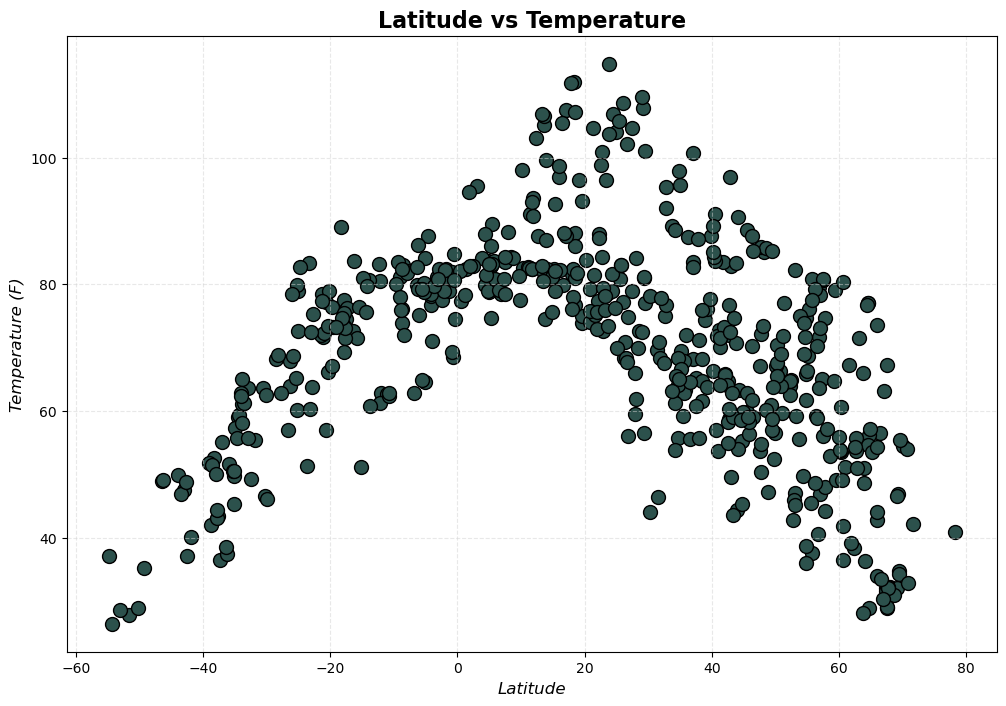

In [12]:
# Build scatter plot for latitude vs. temperature
# getting the data to make the plot
x = clean_city.Lat
y = clean_city['Max Temp']

# setting the plot canvas up
plt.figure(figsize=(12, 8))

# making the plot
plt.scatter(x, y, facecolor="#2C514C", edgecolor="black", s=100)

# making it pretty
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Temperature (F)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# saving and showing the plot
plt.savefig("output_data/Fig1_lat_temp.png")
plt.show()

#### Latitude Vs. Humidity

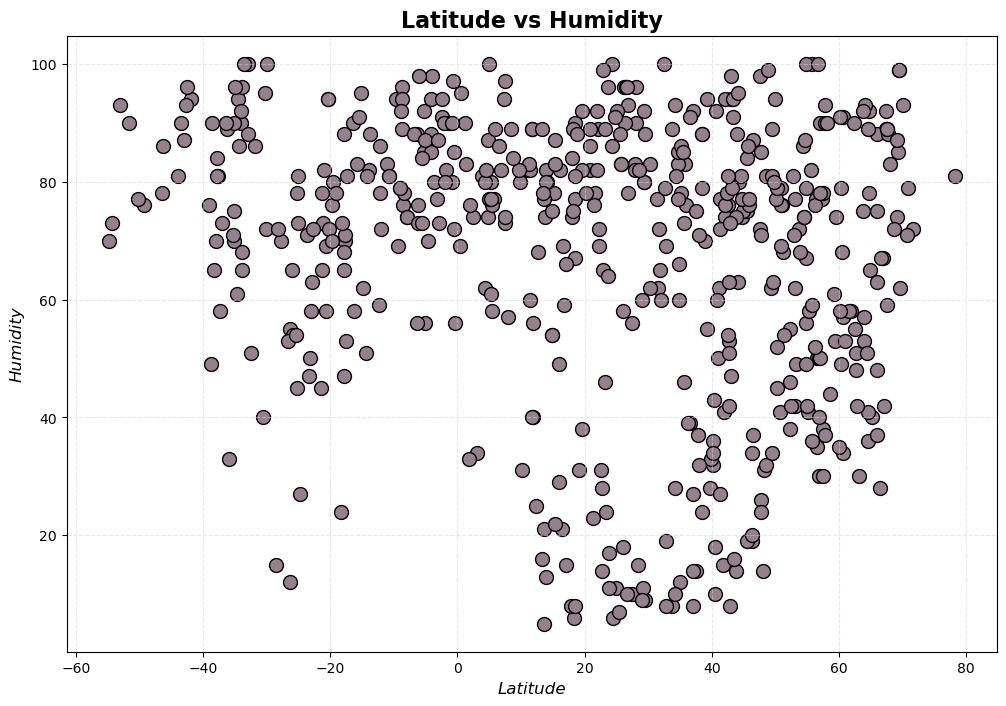

In [13]:
# Build the scatter plots for latitude vs. humidity
# getting the data to make the plot
x = clean_city.Lat
y = clean_city.Humidity

# setting the plot canvas up
plt.figure(figsize=(12, 8))

# making the plot
plt.scatter(x, y, facecolor="#95818D", edgecolor="black", s=100)

# making it pretty
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# saving and showing the plot
plt.savefig("output_data/Fig1_lat_humid.png")
plt.show()

#### Latitude Vs. Cloudiness

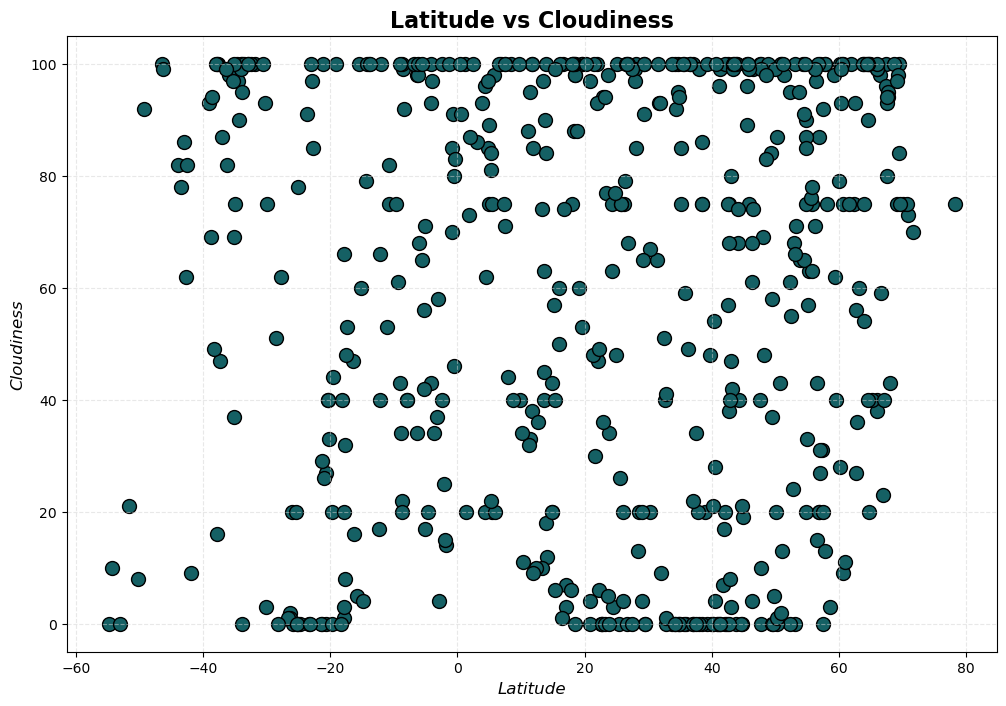

In [14]:
# Build the scatter plots for latitude vs. cloudiness
# getting the data to make the plot
x = clean_city.Lat
y = clean_city.Cloudiness

# setting the plot canvas up
plt.figure(figsize=(12, 8))

# making the plot
plt.scatter(x, y, facecolor="#156064", edgecolor="black", s=100)

# making it pretty
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# saving and showing the plot
plt.savefig("output_data/Fig1_lat_cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

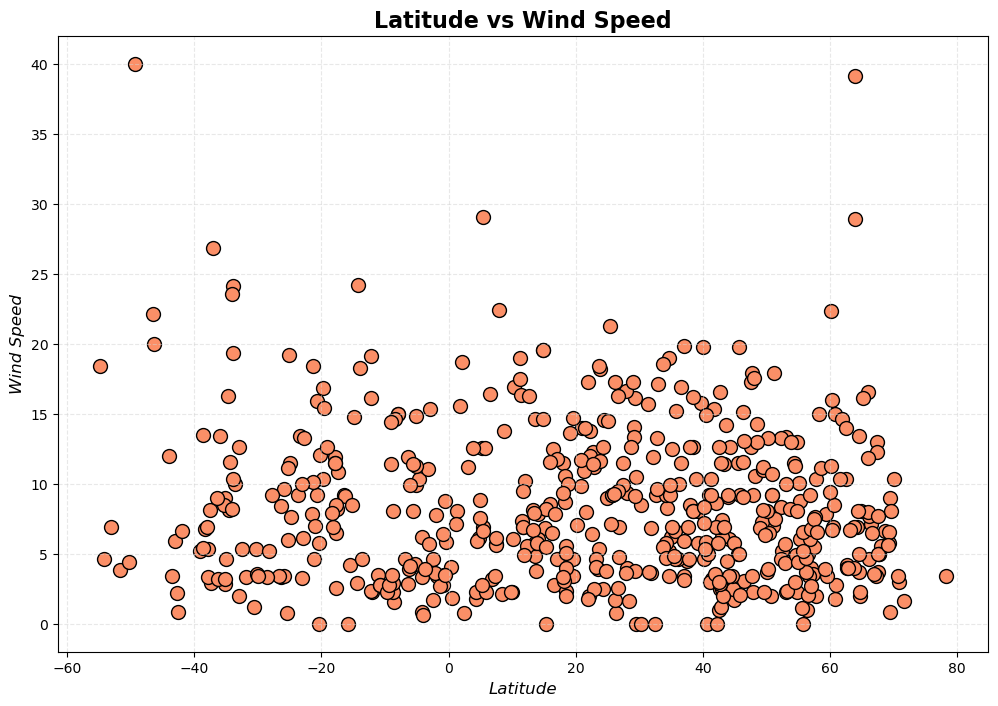

In [15]:
# Build the scatter plots for latitude vs. wind speed
# getting the data to make the plot
x = clean_city.Lat
y = clean_city['Wind Speed']

# setting the plot canvas up
plt.figure(figsize=(12, 8))

# making the plot
plt.scatter(x, y, facecolor="#FB8F67", edgecolor="black", s=100)

# making it pretty
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# saving and showing the plot
plt.savefig("output_data/Fig1_lat_wind.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def doRegression (x_value, y_values, x_title, y_title, annotation_pos):
    # USING LINREGRESS

    # makes the line of best fit
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # calculating the predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # making the plot
    # Setting up the canvas
    plt.figure(figsize=(12, 8))

    # Making the basic plot
    plt.scatter(x_values, y_values, facecolor="#53917E", edgecolor="black", s=100)
    plt.plot(x_values, regress_values, "r-") # plots the line of best fit

    # Making it pretty 
    plt.xlabel(x_title, fontsize=12, fontstyle="italic")
    plt.ylabel(y_title, fontsize=12, fontstyle="italic")
    plt.title(f"{x_title} vs {y_title}", fontweight="bold", fontsize=16)
    plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

    plt.annotate(line_eq, annotation_pos, fontsize=15,color="red")

    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = clean_city.loc[clean_city.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,igarka,67.4667,86.5833,32.02,92.0,100.0,13.00,RU,1.717330e+09
5,5,whitehorse,60.7161,-135.0538,41.77,57.0,75.0,15.01,CA,1.717329e+09
6,6,sitka,57.0531,-135.3300,46.83,90.0,100.0,4.00,US,1.717330e+09
7,7,puerto san jose,13.9256,-90.8244,80.91,82.0,100.0,5.64,GT,1.717330e+09
10,10,ad dawadimi,24.5077,44.3924,106.95,6.0,3.0,14.56,SA,1.717330e+09


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = clean_city.loc[clean_city.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,puerto natales,-51.7236,-72.4875,27.82,90.0,21.0,3.87,CL,1.717330e+09
2,2,waitangi,-43.9535,-176.5597,49.82,81.0,82.0,11.99,NZ,1.717330e+09
3,3,puerto ayora,-0.7393,-90.3518,68.56,97.0,91.0,3.51,EC,1.717330e+09
4,4,saint-pierre,-21.3393,55.4781,78.48,65.0,0.0,18.41,RE,1.717330e+09
8,8,papatowai,-46.5619,169.4708,48.99,78.0,100.0,22.10,NZ,1.717330e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.47436162564485873


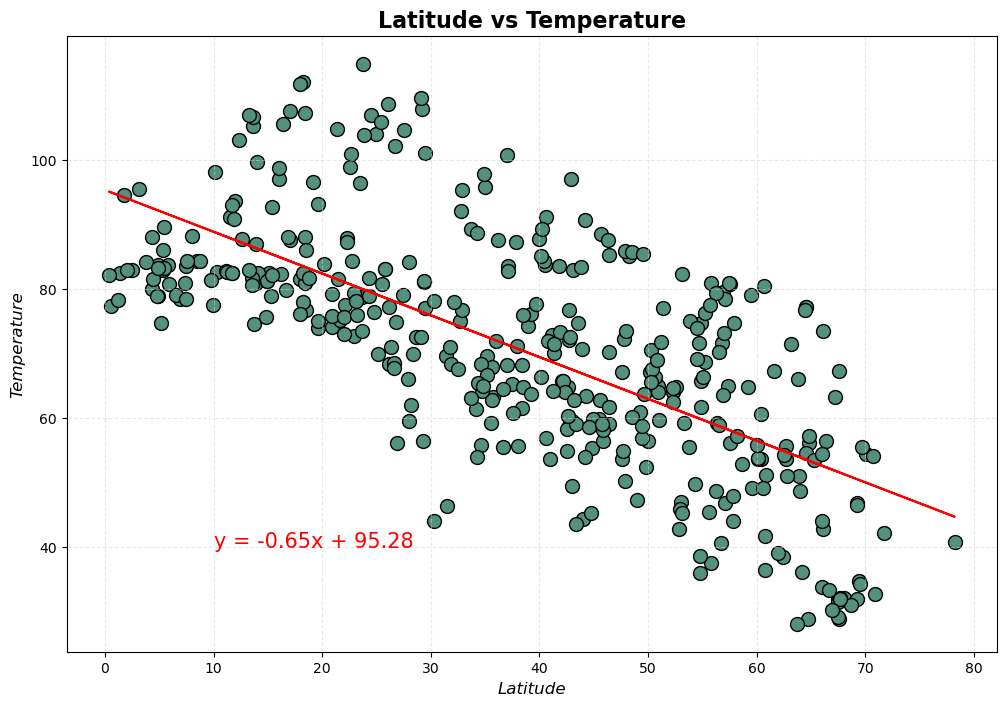

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]
doRegression(x_values, y_values, "Latitude", "Temperature", (10,40))

The r-squared is: 0.6943251533098348


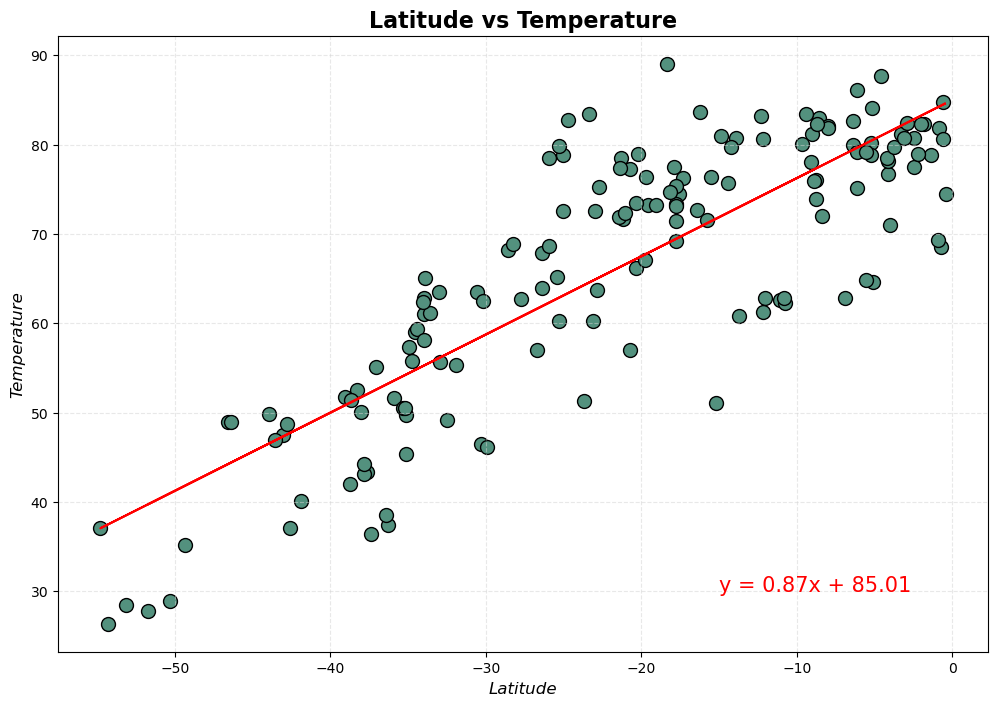

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]
doRegression(x_values, y_values, "Latitude", "Temperature", (-15,30))

**Discussion about the linear relationship:** In these two linear regressions the southern hemisphere is positivly corrolated with a r-value of 0.6943 and the northern hemisphere is negativly corrolated with a r-value of 0.4743. Both of these seem to make sence because the separtaing 'line' of the nothern and southern hemisphere is the equator which is 0 degrees. The closer the city is to the equator generally the higher the high temp is, and this is reflected in the r-squared values. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 6.040448362724308e-05


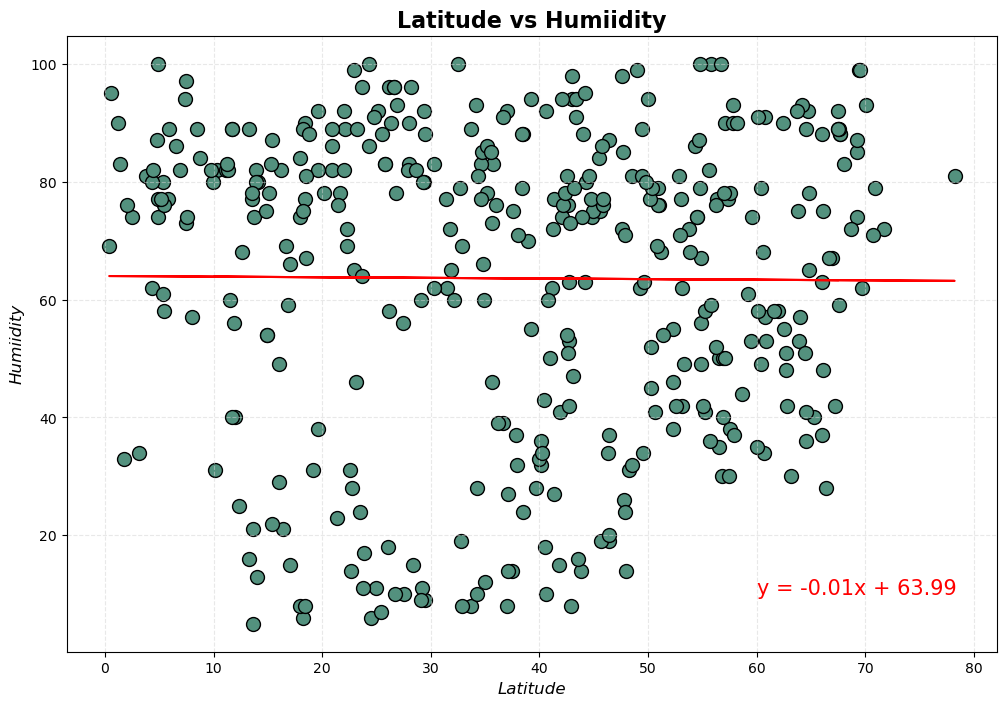

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Humidity"]
doRegression(x_values, y_values, "Latitude", "Humiidity", (60,10))

The r-squared is: 0.006134499698760928


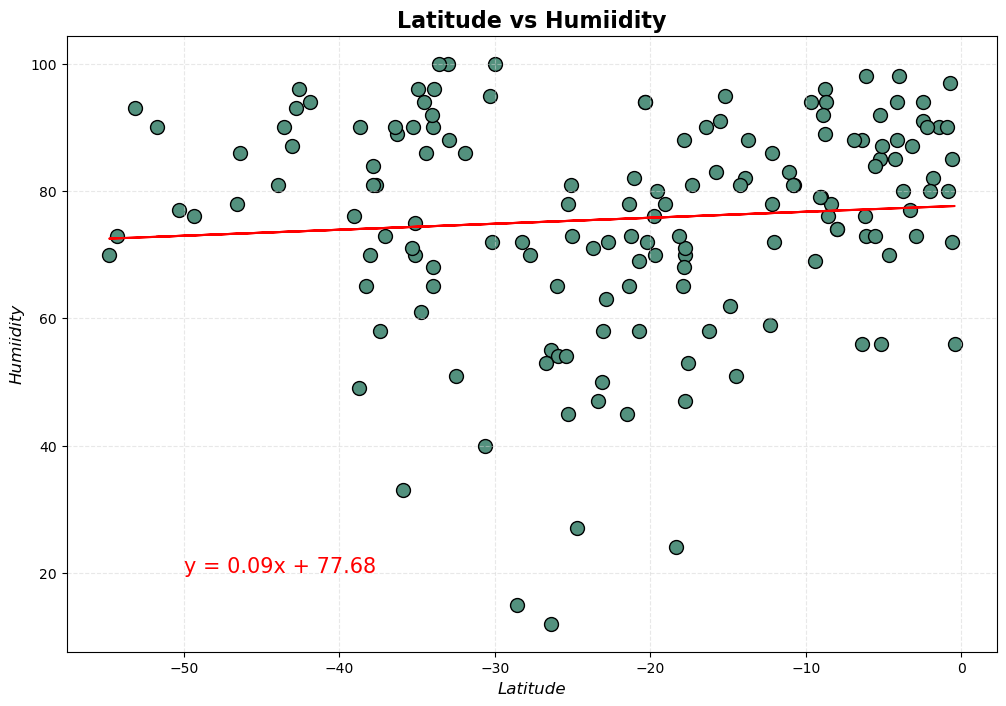

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Humidity"]
doRegression(x_values, y_values, "Latitude", "Humiidity", (-50,20))

**Discussion about the linear relationship:** When looking at these two regressions you can see that there is pretty much no correlation with the northern hemishpere r-value at 0.00006 and the southern hemisphere r-value at 0.0061. Because these values are closer to zero than one it is clear that these two values are not significantly correlated. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.003463490120617661


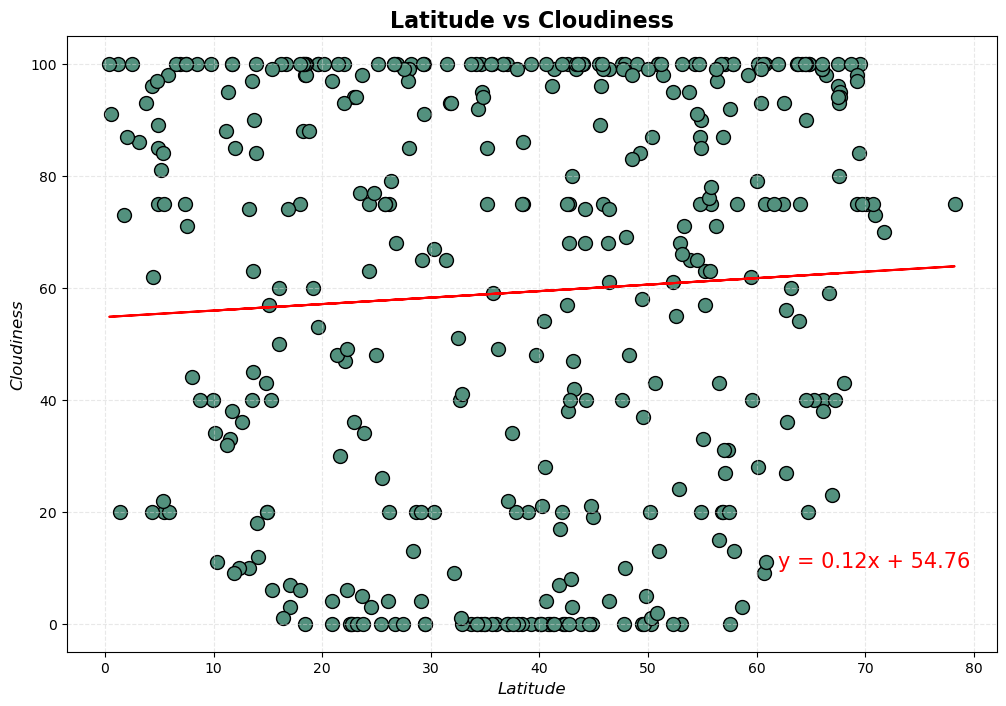

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Cloudiness
doRegression(x_values, y_values, "Latitude", "Cloudiness", (62,10))

The r-squared is: 0.0008385437627527576


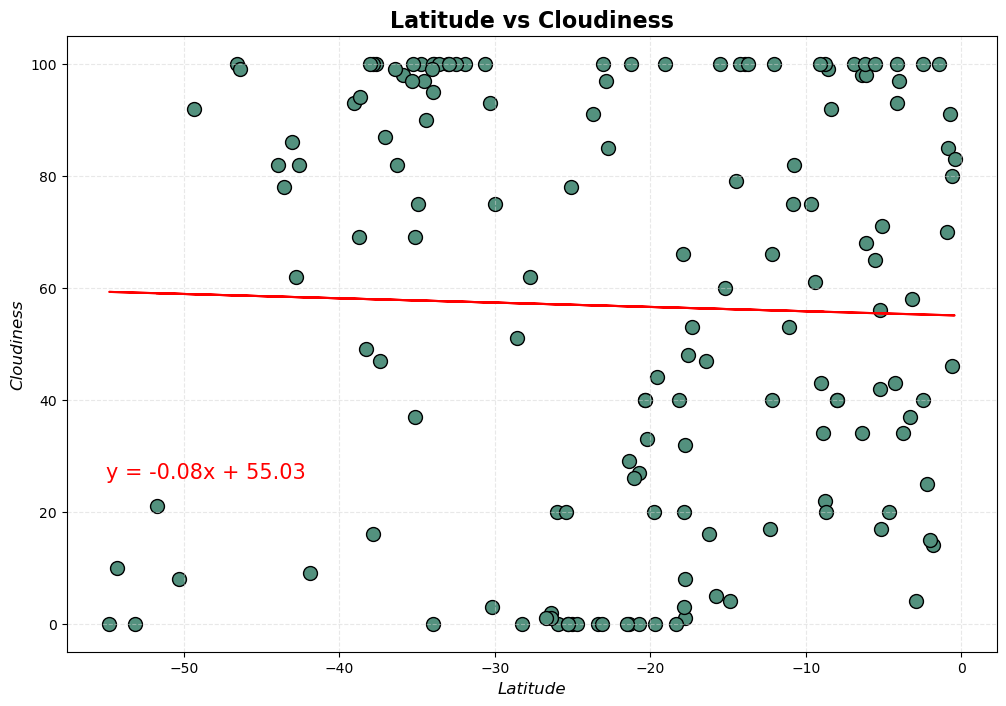

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df.Cloudiness
doRegression(x_values, y_values, "Latitude", "Cloudiness", (-55,26))

**Discussion about the linear relationship:** These two regressions are not closely correlated either. The nothern hemisphere has a r-value of 0.0034 and the southern hemisphere has a r-value of 0.0008. It is clear that cloudieness is not correlated to the latitude of the city.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.006073315288559897


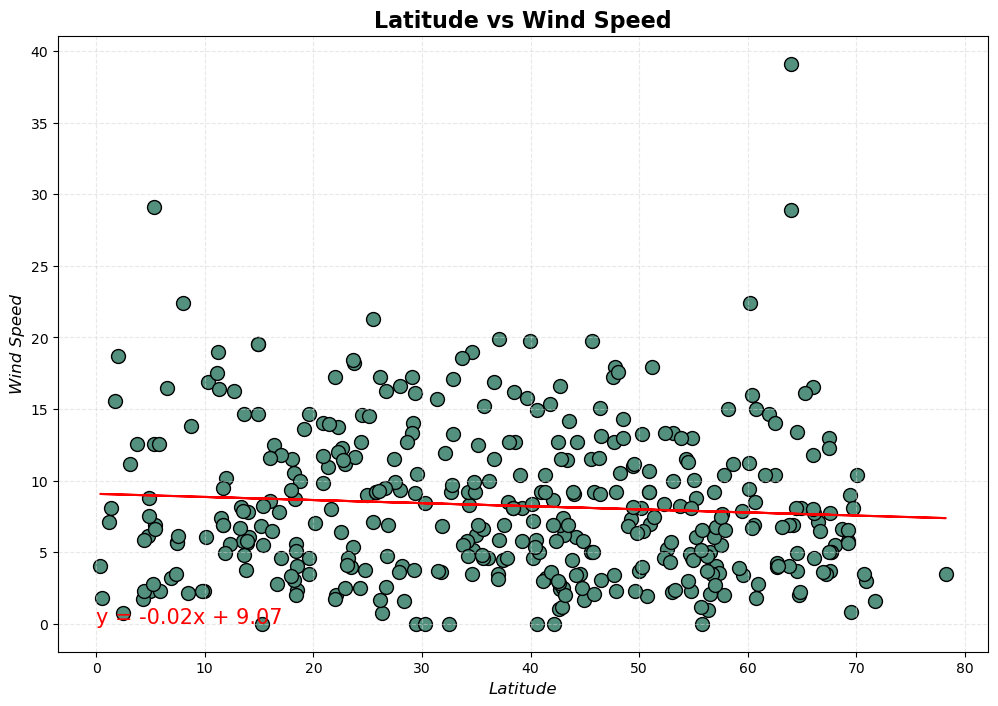

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df['Wind Speed']
doRegression(x_values, y_values, "Latitude", "Wind Speed", (0,0))

The r-squared is: 0.03397204646772749


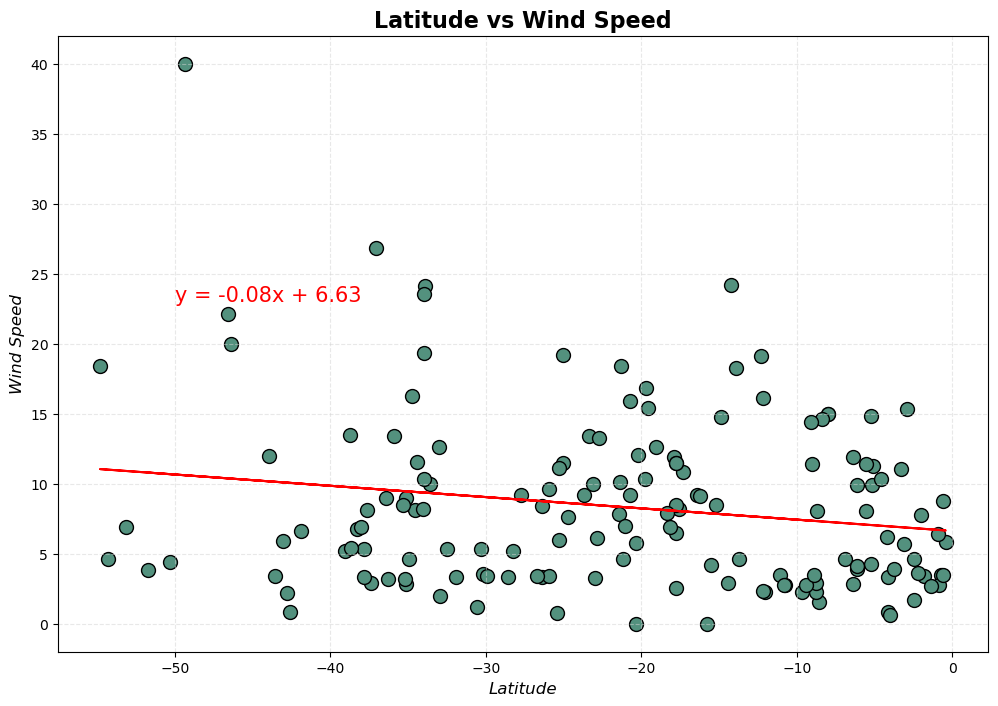

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df['Wind Speed']
doRegression(x_values, y_values, "Latitude", "Wind Speed", (-50,23))

**Discussion about the linear relationship:** In these two regressions the latitude and the wind speed do not seem that they are correlated in the northern hemiphere with a r-value of 0.0060. In the southern hemisphere there is still not a strong correlation but it is greater than the northern hemisphere with a r-value of 0.0339. 